# CMPE 255 Project: Traffic Sign Recognition

**Traffic Sign Recognition:**

Traffic sign Recognition is a software application whose aim  is to recognize traffic signs as efficiently as possible.Here, user will upload an input into the user interface and thereafter, this software will classify the type traffic sign.

Let us deep-dive into the working of the back-end.

## Importing the Libraries

Step 1: Importing the libraries
In this step, we will import the necessary libraries like pandas (for dataframes), matplotlib (for data visualization), keras(for building CNN model and adding layers) etc.

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

## Loading the Dataset

In [ ]:
#connecting the folder containing images
data_dir = '/content/drive/MyDrive/255_Dataset'
path = '/content/drive/MyDrive/255_Dataset/Train'

# Resizing the images to 30x30x3
IMAGE_HEIGHT = 30
IMAGE_WIDTH = 30
channels = 3

In [ ]:
NUMBER_CATEGORIES = len(os.listdir(path))
NUMBER_CATEGORIES

43

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Data Visualization 

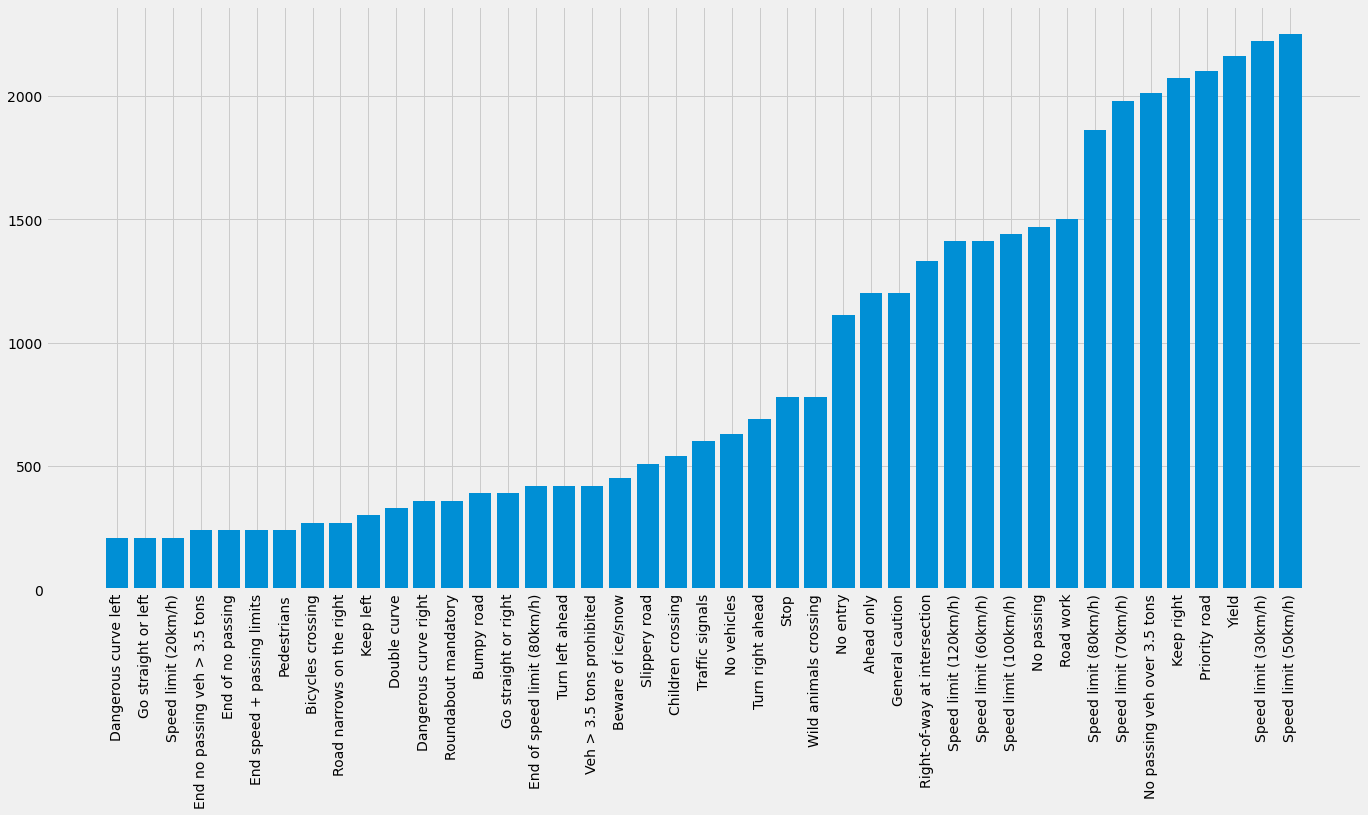

In [ ]:
folders = os.listdir(path)

number_examples = []
target_class_number = []

for folder in folders:
    files = os.listdir(path + '/' + folder)
    number_examples.append(len(files))
    target_class_number.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
sorted_pairs = sorted(zip(number_examples, target_class_number))
tuples = zip(*sorted_pairs)
number_examples, target_class_number = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(target_class_number, number_examples)
plt.xticks(target_class_number, rotation='vertical')
plt.show()

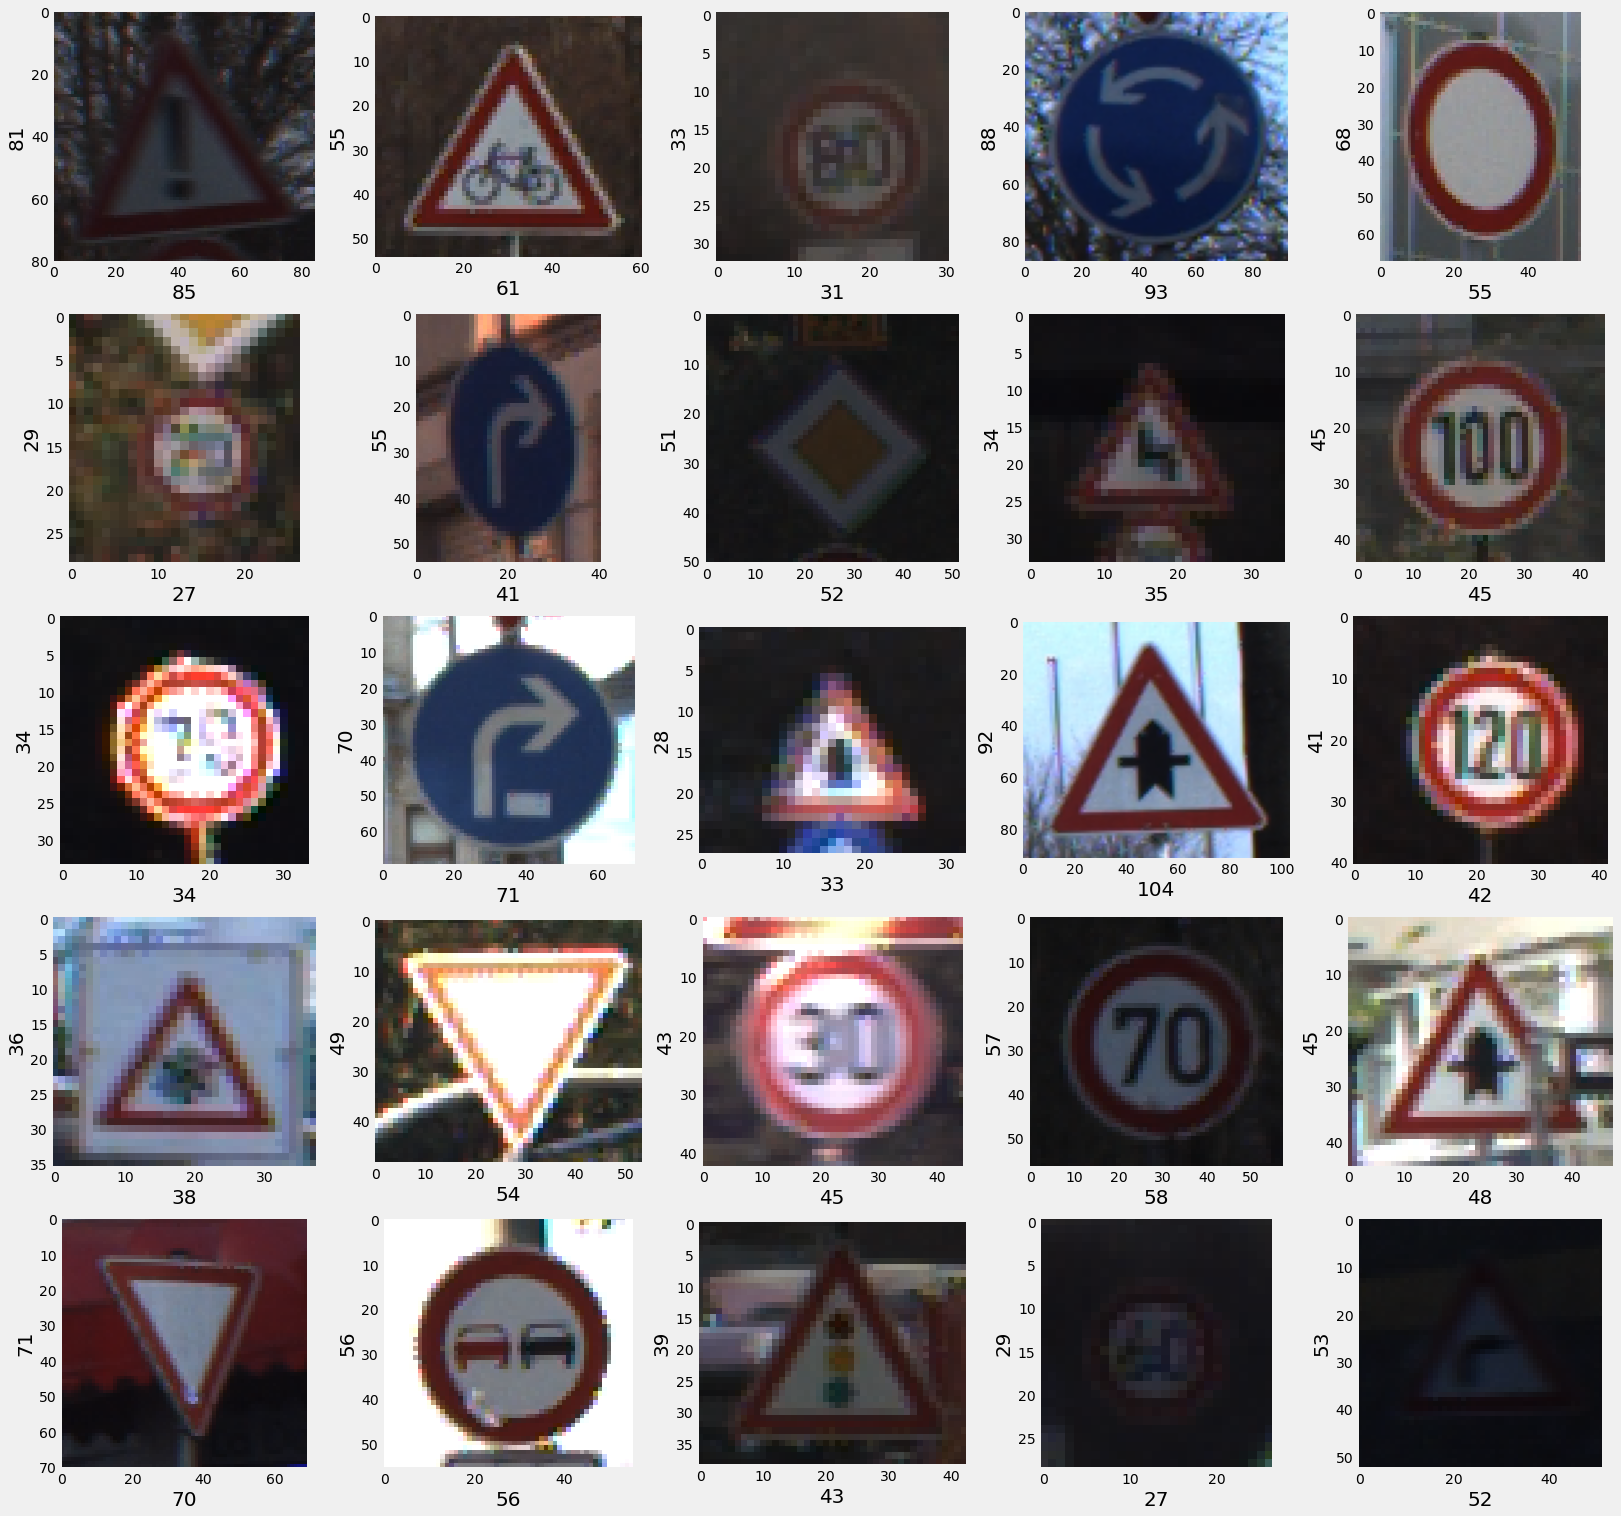

In [ ]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Train.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

## Data Preprocessing

In [ ]:
image_data_list = []
image_labels_list = []

for i in range(NUMBER_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((IMAGE_HEIGHT, IMAGE_WIDTH))#resizing the images to (30,30)
            image_data_list.append(np.array(image))
            image_labels_list.append(i)
        except:
            print("Error in the Image" + img)

# Changing the list to numpy array
image_data_array = np.array(image_data_list)
image_labels_array = np.array(image_labels_list)

print(image_data_array.shape, image_labels_array.shape)

(39219, 30, 30, 3) (39219,)


In [ ]:
os.mkdir('training')

np.save('./training/data',image_data_array)
np.save('./training/target',image_labels_array)

In [ ]:
#image_data_array = np.load("/content/drive/MyDrive/Dataset/CMPE 255 Project/Training/data.npy")
#image_labels_array = np.load("/content/drive/MyDrive/Dataset/CMPE 255 Project/Training/target.npy")

**Data Shuffling**:

The objective of data shuffling to gather and blend up data and derive  logical relationships between columns. In other words, this process arbitrarily shuffles the data based on a single or a set of attributes.

In [ ]:
#We will start shuffling the data from this tab(cell)
shuffle_image_indexes = np.arange(image_data_array.shape[0])
np.random.shuffle(shuffle_image_indexes)
image_data_array = image_data_array[shuffle_image_indexes]
image_labels_array = image_labels_array[shuffle_image_indexes]
#heere, the data shuffling is completed

From this point, we will divide the dataset(Ratio=4:1) into 2 parts :

1) Training dataset(used for training the CNN model): 80%

2) Testing Dataset(used for testing the accuracy of the model):20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_data_array, image_labels_array, test_size=0.2, random_state=53, shuffle=True)
#now, we will bring the values in the range between 0 and 1.
X_train = X_train/255 
X_test = X_test/255


print("X Train Shape", X_train.shape)
print("X Test Shape", X_test.shape)
print("y Train Shape", y_train.shape)
print("y Test Shape", y_test.shape)

X Train Shape (31375, 30, 30, 3)
X Test Shape (7844, 30, 30, 3)
y Train Shape (31375,)
y Test Shape (7844,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUMBER_CATEGORIES)
y_test = keras.utils.to_categorical(y_test, NUMBER_CATEGORIES)

print("y Train Shape", y_train.shape)
print("y Test Shape", y_test.shape)

y Train Shape (31375, 43)
y Test Shape (7844, 43)


So here, we have 31k records and 43 classes in thr training data which will be given as input into the model.

And for the testing dataset, it contains about 8k records, which will be given as input to check the accuracy of the CNN trained model.

## Model Building

Here we used try and error method by changing order of convolutions, normalization etc., but we achieved 99.85 percent accuracy on testing data so we finalized this version of our model.

We have added following layers:

1) 2D convolution layer(to convert the images in order to  gain some features)

2) Max Pooling(to reduce and highlight thre parameters in an image)

3) Batch Normalization(to normalize the inputs)

4)Flatten Layer(to convert in single dimension)

5) Dense Layer(For changing the dimensions of the given vector)

6) Dropout Layer(to prevent overfitting)

In [ ]:
#Here , we will add new layers inside a sequential model.
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

Here , the model is already built and now, we will compile the model.

Adam's Optimzation:
In order to update and optimize the weights of the training data, we will use Adam's optimization technique.

And in addition to that, we will train the neural network on 20 Epochs.

In [ ]:
lr = 0.001
epochs = 20

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Now, let us visualize  the strength of the relationship between the developed model and the dependent variable
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 128)        

**Data Augmentation:**

Data Augmentation is a technique to create new training data from the existing data . This technique is used to increase the size of the training data to be given as input in the training model by performing minor modifications in the existing data.The Neural network will consider all the images as distinct images which will: 

1)Increase the overall performance of the model

2) protect overfitting.

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs)

Epoch 1/20
981/981 [==============================] - 31s 31ms/step - loss: 1.7309 - accuracy: 0.5318
Epoch 2/20
981/981 [==============================] - 30s 31ms/step - loss: 0.4030 - accuracy: 0.8815
Epoch 3/20
981/981 [==============================] - 30s 30ms/step - loss: 0.2113 - accuracy: 0.9395
Epoch 4/20
981/981 [==============================] - 31s 32ms/step - loss: 0.1409 - accuracy: 0.9587
Epoch 5/20
981/981 [==============================] - 30s 30ms/step - loss: 0.1081 - accuracy: 0.9681
Epoch 6/20
981/981 [==============================] - 30s 30ms/step - loss: 0.0899 - accuracy: 0.9748
Epoch 7/20
981/981 [==============================] - 30s 31ms/step - loss: 0.0709 - accuracy: 0.9792
Epoch 8/20
981/981 [==============================] - 30s 30ms/step - loss: 0.0610 - accuracy: 0.9822
Epoch 9/20
981/981 [==============================] - 30s 30ms/step - loss: 0.0599 - accuracy: 0.9826
Epoch 10/20
981/981 [==============================] - 30s 30ms/step - loss: 0.049

Note: At the 20th epoch, the accuracy is 99.36% over the training dataset

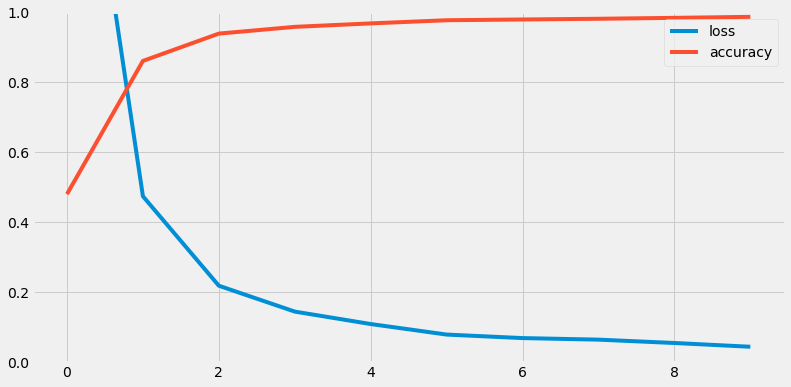

In [ ]:
#let us visualize the loss and accuracy graph of the model trained over the trained dataset.
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Note: we can see from the above graph that both the curves (Accuracy/loss) stabilizes after a certain point , which is good sign.

**Conclusion:**

From the above graph, We can derive that the accuracy is stabilized when the model is trained at 20 Epochs.

1)The loss calculated at the 20th Epoch is 0.0229.

2)The accuracy calculated at last on the training data is 99.34%.

## Model Testing & Evaluation

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred, axis=1)))

Test Data accuracy:  0.9991075981642019


Note: After running the above cell, it is found that accuracy of the model over the test data is about 99.91%.

**Performance Evaluation:**

Now , we will evaluate the performance of the model using 
 measures :

 1) Confusion Matrix
 
 2) Classification Report 

**Confusion Matrix:**

Confusion matrix is a performance evaluation measure which gives perfect knowledge and insights of how the classes are classified or misclassified. 

here, the diagonal elements depicts the number of calculated points whose labels are predicted correctly, on the other hand, other points depicts the points which are not predicted in the correct manner.

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred, axis=1))

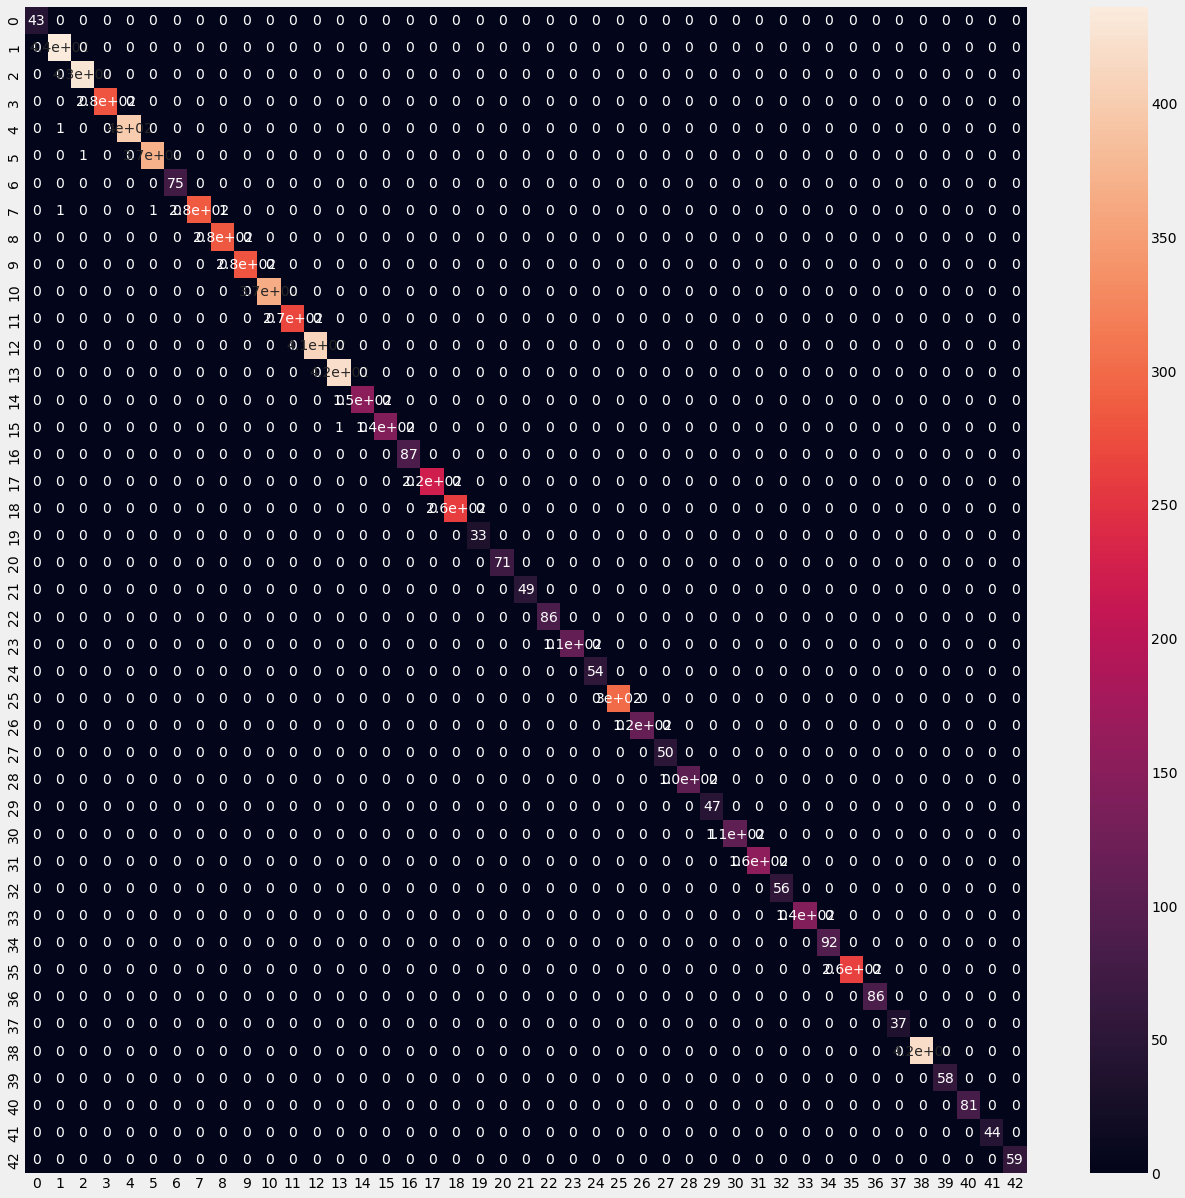

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

**Classification Report**

Classification report is an important performance evaluation measure. In this technique, the performance of the model built is checked using different types of metrics like f1-score, precision, recall and support.



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       436
           2       1.00      1.00      1.00       429
           3       1.00      1.00      1.00       280
           4       1.00      1.00      1.00       401
           5       1.00      1.00      1.00       372
           6       1.00      1.00      1.00        75
           7       1.00      0.99      0.99       288
           8       1.00      1.00      1.00       283
           9       1.00      1.00      1.00       280
          10       1.00      1.00      1.00       366
          11       1.00      1.00      1.00       269
          12       1.00      1.00      1.00       410
          13       1.00      1.00      1.00       421
          14       1.00      1.00      1.00       154
          15       1.00      0.99      1.00       143
          16       1.00      1.00      1.00        87
          17       1.00    

Now, we will actually see if the model correctly classifies the type of image or not by giving images from different classes as input .

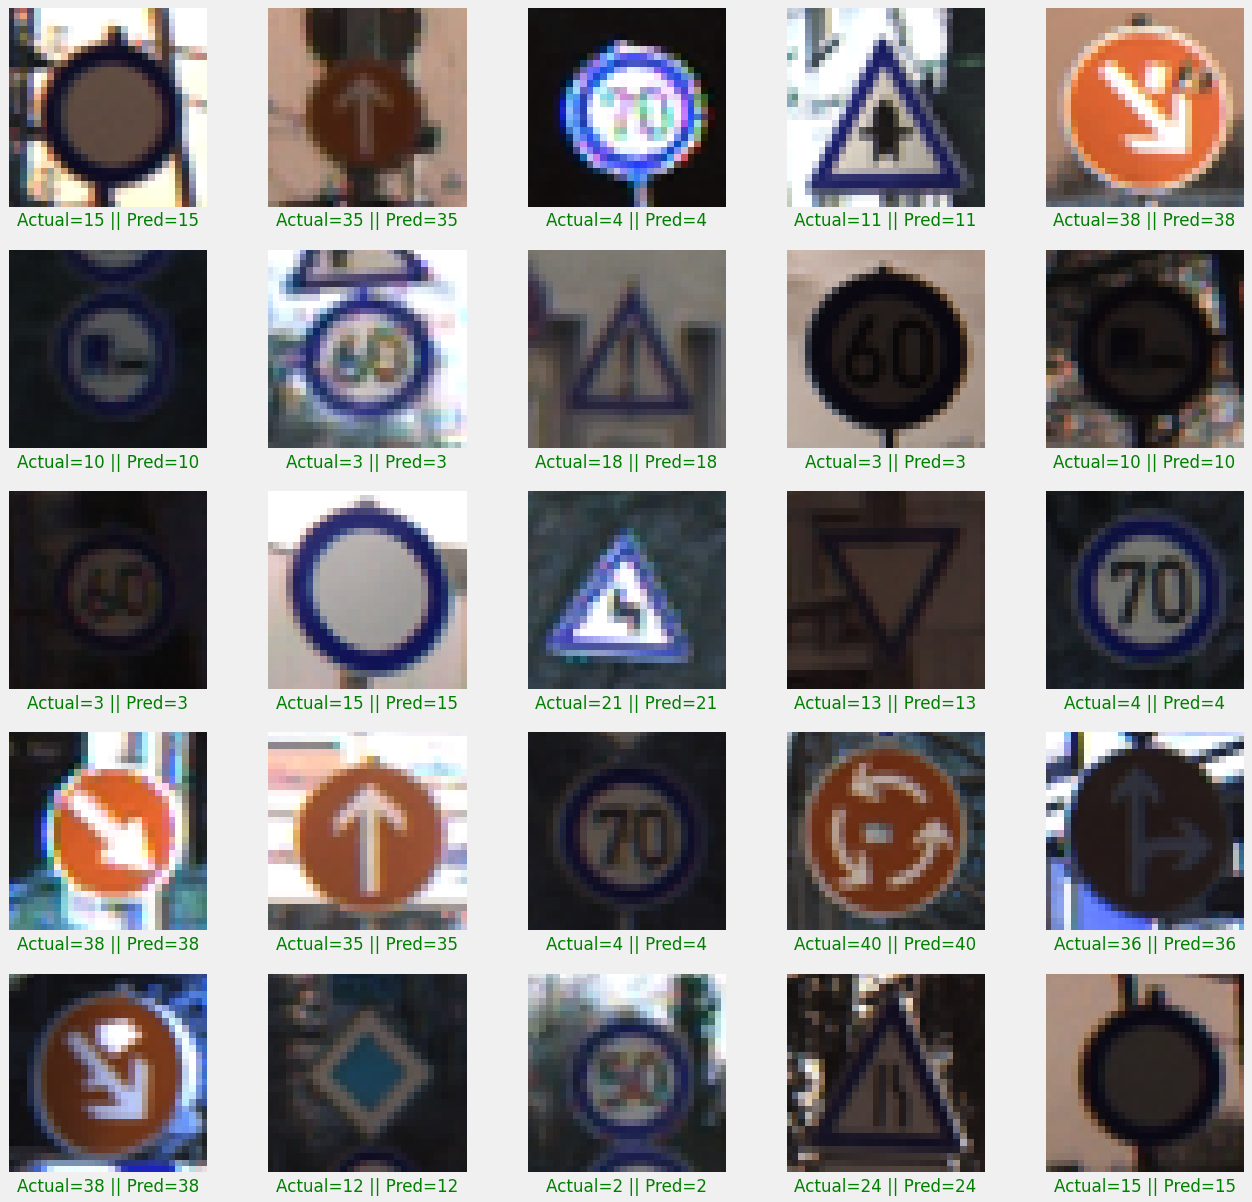

In [ ]:
plt.figure(figsize = (20, 20))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = y_pred[start_index + i]
    actual = y_test[start_index + i]
    col = 'g'
    if prediction.any() != actual.any():
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(np.argmax(actual), np.argmax(prediction)), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
#model.save("./TSR NEW.h5")